# Student Performance

## Life cycle of Machine Learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to Perform
- Exploratory Data Analysis
- Data Pre-Processing
- Model Training
- Choose Best Model

## 1. Problem Statement
- This project understands how students marks get affected through various dependencies

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Import the CSV Data as Pandas Dataframe

In [2]:
df = pd.read_csv('data/raw.csv')

## Show Top 5 Records

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Shape of the data

In [4]:
df.shape

(1000, 8)

## 2. Dataset Information

In [5]:
for col in df.columns:
    if col != "reading score" and col != "writing score" and col != "math score":
        print(f"{col}: {df[col].unique()}\n")

gender: ['female' 'male']

race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']

parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

lunch: ['standard' 'free/reduced']

test preparation course: ['none' 'completed']



## 3. Datachecks to perform
- Check missing values
- Check duplicates
- Check data types
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values

### 3.2 Check duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

There are no duplicates

### 3.3 Check the datatypes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Check the number of unique values of each column

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5 Check statistics of data set

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insights
- From above table, all meand are very close to each other- between 66 and 70
- All standard variations are 14 to 15.19
- Minimum scores for math = 0, reading = 17 and writing = 10

### 3.6 Check various categories present in the different categorical column

In [11]:
for col in df.columns:
    if col != "reading score" and col != "writing score" and col != "math score":
        print(f"Category in '{col}': {df[col].unique()}\n")

Category in 'gender': ['female' 'male']

Category in 'race/ethnicity': ['group B' 'group C' 'group A' 'group D' 'group E']

Category in 'parental level of education': ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Category in 'lunch': ['standard' 'free/reduced']

Category in 'test preparation course': ['none' 'completed']



In [12]:
# Define numerical and categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'object']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']

# #Second way to define numerical and categorical columns
# numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# categoricalcategorical_features_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()


# Print columns
print("We have {} numerical columns: {}".format(len(numerical_features), numerical_features))
print("We have {} categorical columns: {}".format(len(categorical_features), categorical_features))


We have 3 numerical columns: ['math score', 'reading score', 'writing score']
We have 5 categorical columns: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### 3.7 Adding columns for "Total Score" and "Average"

In [13]:
df["Total_score"] = df["reading score"] + df["writing score"] + df["math score"]

df["average_score"] = df["Total_score"]/3

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_full = (df["reading score"] == 100).sum()
writing_full = (df["writing score"] == 100).sum()
math_full = (df["math score"] == 100).sum()

print(f"Number of students with full marks in math: {math_full}")
print(f"Number of students with full marks in reading: {reading_full}")
print(f"Number of students with full marks in writing: {writing_full}")

Number of students with full marks in math: 7
Number of students with full marks in reading: 17
Number of students with full marks in writing: 14


In [15]:
reading_20 = (df["reading score"] <= 20).sum()
writing_20 = (df["writing score"] <= 20).sum()
math_20 = (df["math score"] <= 20).sum()

print(f"Number of students with marks less than 20 in math: {math_20}")
print(f"Number of students with marks less than 20 in reading: {reading_20}")
print(f"Number of students with marks less than 20 in writing: {writing_20}")

Number of students with marks less than 20 in math: 4
Number of students with marks less than 20 in reading: 1
Number of students with marks less than 20 in writing: 3


### Insights
- From above data, Students in maths are performing the worst
- The best performance is in Reading

## 4. Exploring Data (Visualization)
### 4.1 Visualize average score distribution to make some conclusions
- Histogram
- Kernel Distribution Function

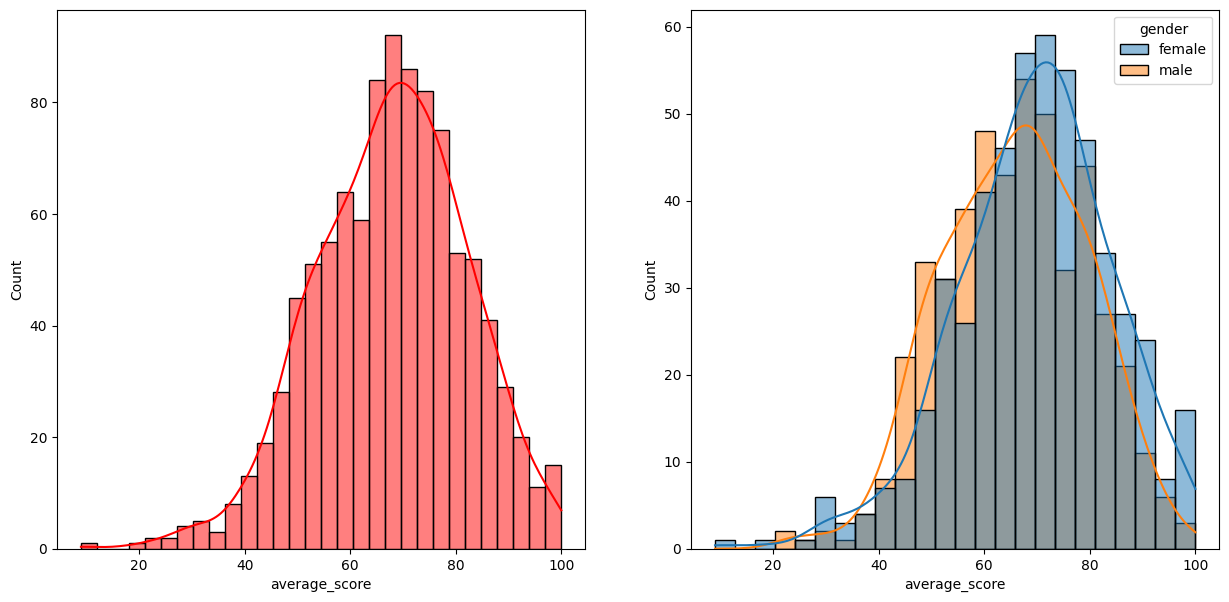

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x="average_score", bins=30, kde=True, color='red')
plt.subplot(122)
sns.histplot(data=df, x="average_score", kde=True, hue="gender")
plt.show()

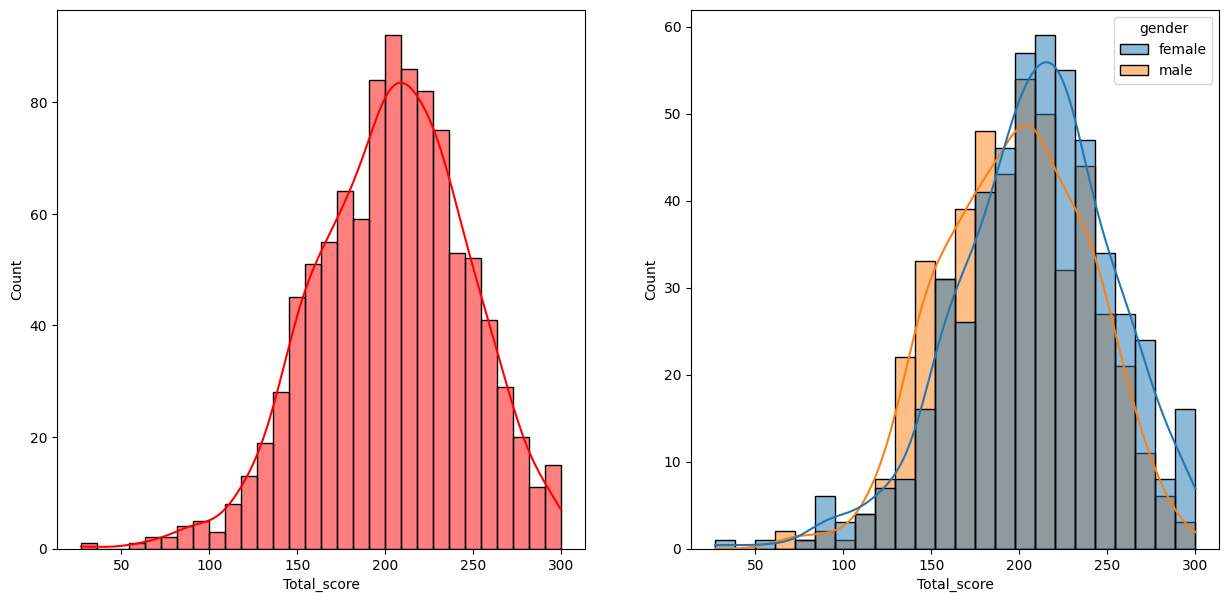

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x="Total_score", bins=30, kde=True, color='red')
plt.subplot(122)
sns.histplot(data=df, x="Total_score", kde=True, hue="gender")
plt.show()

### Insight
- Females are peroforming better than males

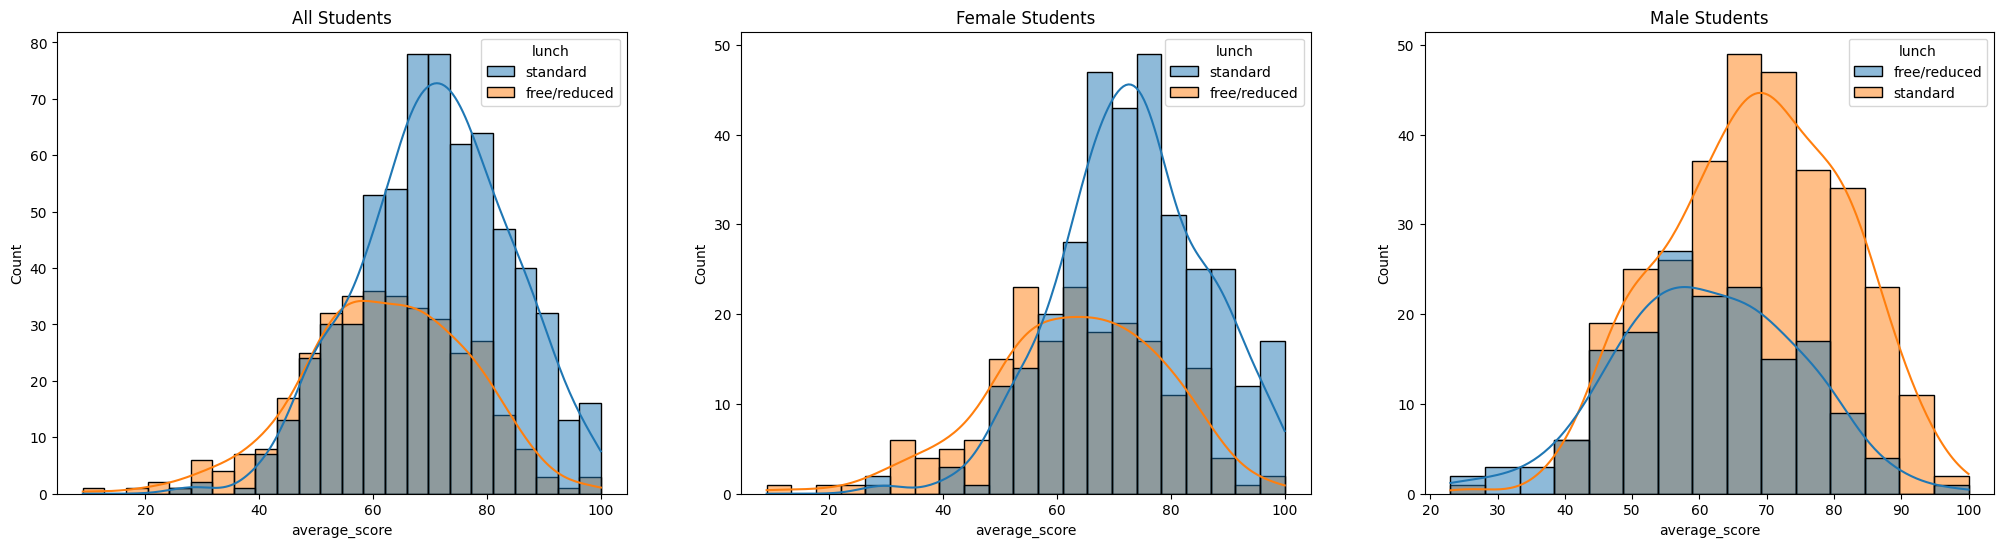

In [ ]:
plt.subplots(1, 3, figsize=(25, 6))

plt.subplot(131)
sns.histplot(data=df, x='average_score', kde=True, hue='lunch')
plt.title('All Students')

plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue='lunch')
plt.title('Female Students')

plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True, hue='lunch')
plt.title('Male Students')

plt.show()

### Insight
- Standard lunch helps perform well in exams be it a male or a female

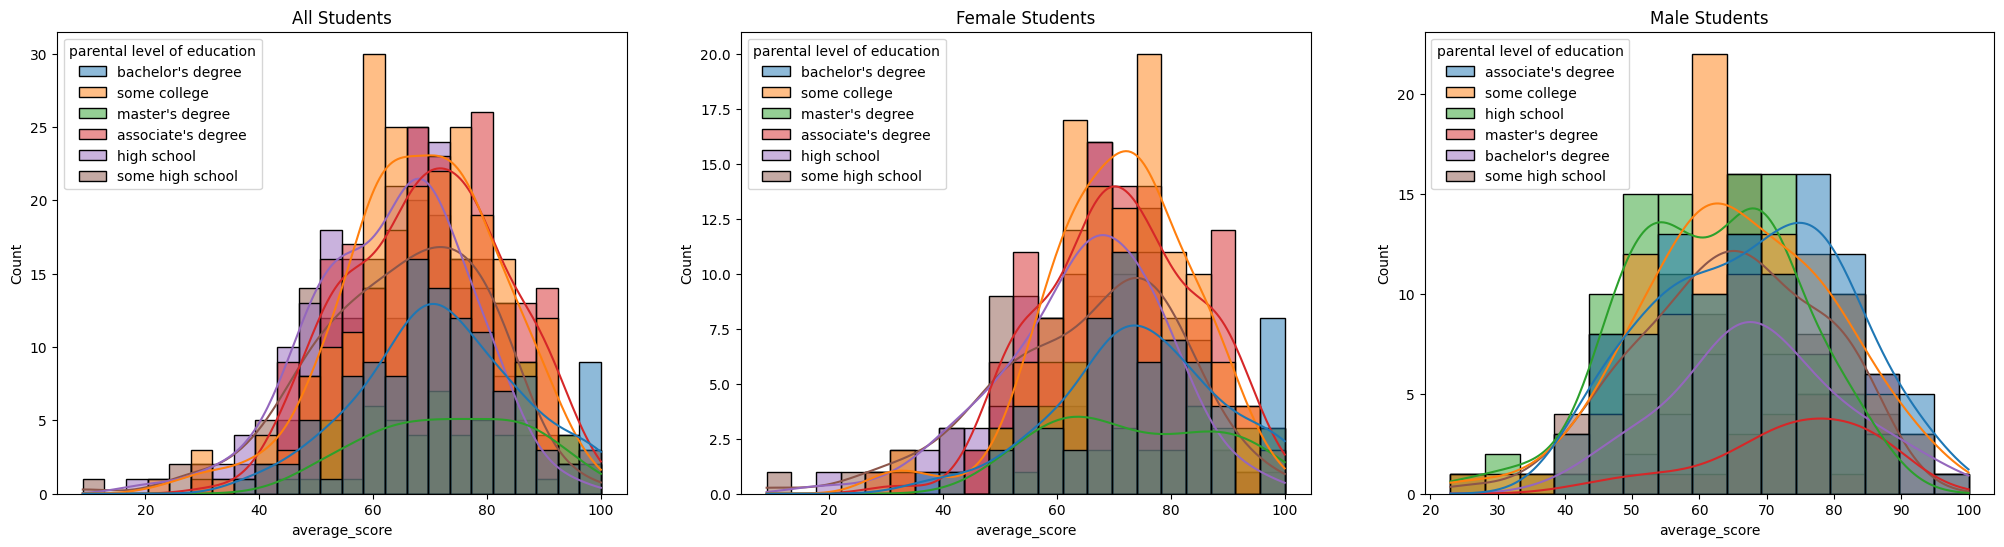

In [19]:
plt.subplots(1, 3, figsize=(25, 6))

plt.subplot(131)
sns.histplot(data=df, x='average_score', kde=True, hue='parental level of education')
plt.title("All Students")

plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'], x='average_score', kde=True, hue='parental level of education')
plt.title("Female Students")

plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x='average_score', kde=True, hue='parental level of education')
plt.title("Male Students")

plt.show()

### Insight
- Average scores increase with parental educational attainment, with students whose parents hold bachelor’s or master’s degrees exhibiting higher score distributions.
- This trend is consistent across both male and female students.
- However, significant overlap across groups indicates that individual performance varies widely irrespective of parental education.

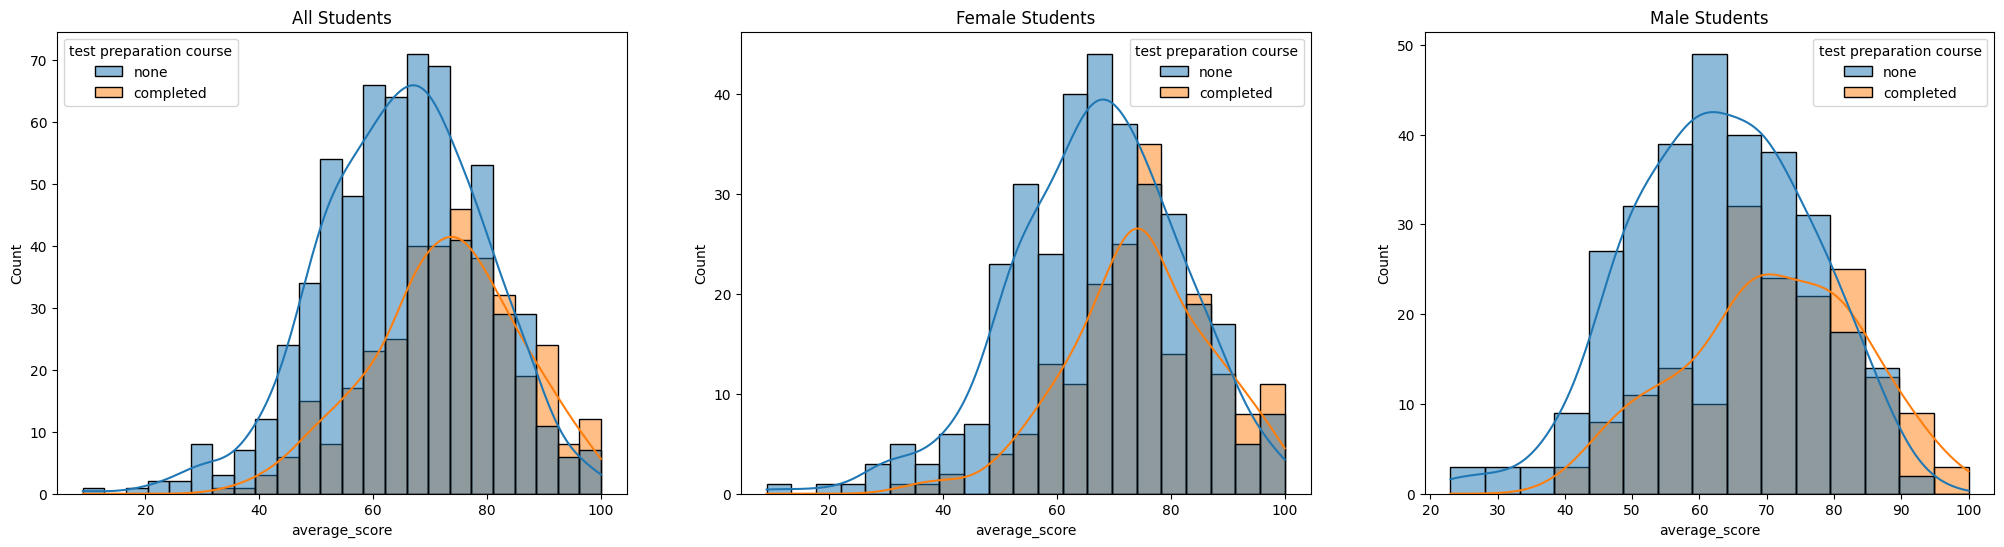

In [20]:
plt.subplots(1, 3, figsize=(25, 6))

plt.subplot(131)
sns.histplot(data=df, x='average_score', kde=True, hue='test preparation course')
plt.title("All Students")

plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'], x='average_score', kde=True, hue='test preparation course')
plt.title("Female Students")

plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x='average_score', kde=True, hue='test preparation course')
plt.title("Male Students")

plt.show()

### Insight
- Students who completed the test preparation course consistently achieved higher average scores compared to those who did not. 
- This trend holds across both male and female students, suggesting that test preparation has a positive and gender-independent association with academic performance. 
- Female students additionally exhibit slightly lower score variability than male students.

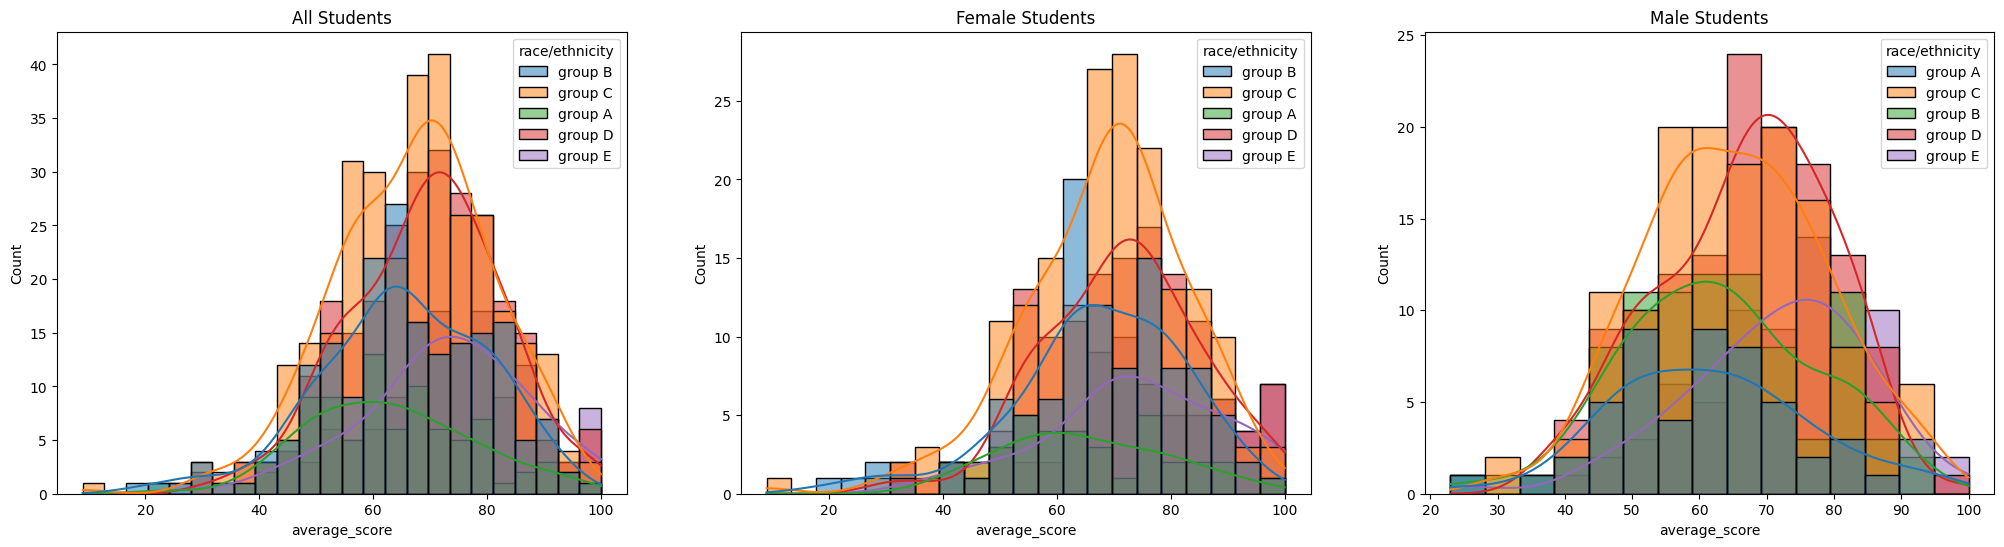

In [21]:
plt.subplots(1, 3, figsize=(25, 6))

plt.subplot(131)
sns.histplot(data=df, x='average_score', kde=True, hue='race/ethnicity')
plt.title('All Students')

plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue='race/ethnicity')
plt.title('Female Students')

plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True, hue='race/ethnicity')
plt.title('Male Students')

plt.show()

### Insight
- Average score distributions vary across race/ethnicity groups, with Groups D and E generally exhibiting higher central tendencies, followed by Group C, and then Groups A and B.
- These patterns are consistent across both male and female students.
- Female students show slightly lower variability in scores across most groups.
- However, substantial overlap between distributions indicates that individual performance varies widely within each group.